In [1]:
"""
특성공학
"""
# 다중회귀 multiple regression

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [2]:
# label
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(perch_full,
                                                    perch_weight,
                                                    random_state=42)

In [5]:
# 사이킷런 특성을 만들거나 전처리하기 위한 클래스 >> 변환기
# LinearRegression 같은 모델 클래스 >> 추정기

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [6]:
# poly 이용 perch data 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
train_poly.shape

(42, 9)

In [9]:
# poly클래스 사용했을 때 특성조합 출력
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [10]:
# train set을 기준으로 test셋 변환
test_poly = poly.transform(X_test)

In [14]:
# 만든 poly 데이터로 다중회귀모델 훈련

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(train_poly, y_train)
train_score = model_lr.score(train_poly, y_train)
test_score = model_lr.score(test_poly, y_test)
print(train_score, test_score)

0.9903183436982124 0.9714559911594087


In [23]:
# 특성이 늘어나면 선형회귀의 예측력은 강해진다.
# 하지만 Polynomial 클래스의 degree(차수)를 너무 많이 높이면 과적합이 발생한다.
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
train_poly.shape

(42, 55)

In [40]:
# 위에서 차수를 높혀 다시 만든 train_poly로 선형회귀모델 훈련

model_lr.fit(train_poly, y_train)
train_score = model_lr.score(train_poly, y_train)
test_score = model_lr.score(test_poly, y_test)
print(train_score, test_score)

0.9999999999995844 -144.40578128564164


In [25]:
# test에서 예상대로 과적합 발생
# 과적합 방지를 위한 '규제'가 필요
# 규제란 선형 회귀 모델에 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 일
# 규제를 적용하기 이전에 특성의 스케일 조정 필요
# standard scaler 이용한 scaling (Zscore)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [28]:
# Ridge regression (L2 규제)
# 계수를 제곱한 값을 기준으로 규제 적용
# 일반적으로 선호

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9896101671037343
0.9790693977615391


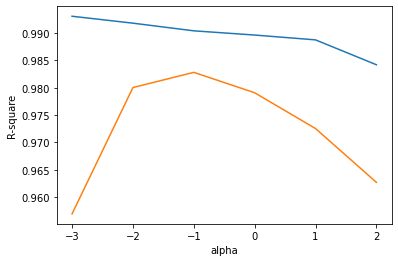

In [30]:
# 릿지와 라쏘 모두 alpha라는 하이퍼파라미터 조절 가능
# alpha가 커지면 규제 강도가 강해짐
# alpha에 따른 R-square 값 시각화

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.show() # alpha 가 0.1 일때 가장 성능이 좋음

In [37]:
# Lasso Regression (L1 규제)

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.989789897208096
0.9800593698421886


c:\users\sysan\pycharmprojects\study\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779461, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
c:\users\sysan\pycharmprojects\study\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.82134540023, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


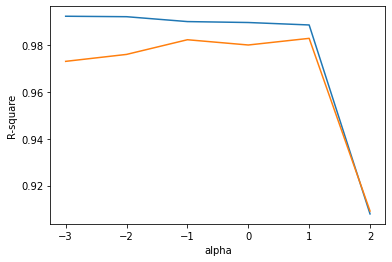

In [38]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.show() # alpha가 1 일 때 최적의 성능

In [39]:
# 라쏘모델은 계수를 0으로 만들 수 있는데
# 이 때 특성을 사용한 개수를 알 수 있음
np.sum(lasso.coef_==0)

52